 Let's see the results of irepa:
 
 TO DO:
 
    1: Plot trajectories of nominal, running, terminal crocoddyl from same starting points (x = 1.5)
    
    2: Plot value functions of nominal, running, terminal crocoddyl
    
    3: Plot prediction loss of running1, running25, terminal crocoddyl
    
    4: Plot disparity and MSE between :
    
        1: Nominal and Running1
        
        2: Nominal and Terminal crocoddyl
        
        3: Running 25 vs Nominal
        
        4: Running 45 to Terminal
    

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_generator import Datagen
from feedforward_network import FeedForwardNet
from residual_network import ResidualNet
from terminal_unicycle import FeedforwardUnicycle, ResidualUnicycle
from ddp_solver import solve_problem
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import plot_trajectories

In [3]:
fnet1 = torch.load('./Fnet/net1.pth')
fnet5 = torch.load('./Fnet/net5.pth')
fnet10 = torch.load('./Fnet/net10.pth')
fnet17 = torch.load('./Fnet/net17.pth')
fnet30 = torch.load('./Fnet/net30.pth')
fnet50 = torch.load('./Fnet/net50.pth')


rnet1 = torch.load('./Rnet/net1.pth')
rnet5 = torch.load('./Rnet/net5.pth')
rnet10 = torch.load('./Rnet/net10.pth')
rnet17 = torch.load('./Rnet/net17.pth')
rnet30 = torch.load('./Rnet/net30.pth')
#rnet50 = torch.load('./Rnet/net50.pth')


In [4]:
def data_plotting(size = 1):
    x = np.zeros((size, 1)) - 2.1
    y = np.random.uniform([-.001, 0], size = (size, 1))
    z = np.zeros((size, 1))
    
    return np.hstack((x, y, z))

In [5]:
data_set = data_plotting()

In [6]:
def trajectories(net, dataset):
    traj = []
    cost = []
    iters = []
    for data in dataset:
        terminal_model = FeedforwardUnicycle(net)
        ddp = solve_problem(terminal_model=terminal_model, initial_configuration=data)
        xs_ = np.array(ddp.xs)
        xs  = xs_[:,0:2]
        traj.append(xs)
        cost.append(ddp.cost)
        iters.append(ddp.iter)
    return traj, cost, iters

fnet1_t, fnet1_c, fnet1_i = trajectories(fnet1, dataset=data_set)
fnet5_t, fnet5_c, fnet5_i = trajectories(fnet5, dataset=data_set)
fnet10_t, fnet10_c, fnet10_i = trajectories(fnet10, dataset=data_set)
fnet17_t, fnet17_c, fnet17_i = trajectories(fnet17, dataset=data_set)
fnet30_t, fnet30_c, fnet30_i = trajectories(fnet30, dataset=data_set)
fnet50_t, fnet50_c, fnet50_i = trajectories(fnet50, dataset=data_set)


Text(0.5, 1.0, 'Irepa with Feedforward Network.')

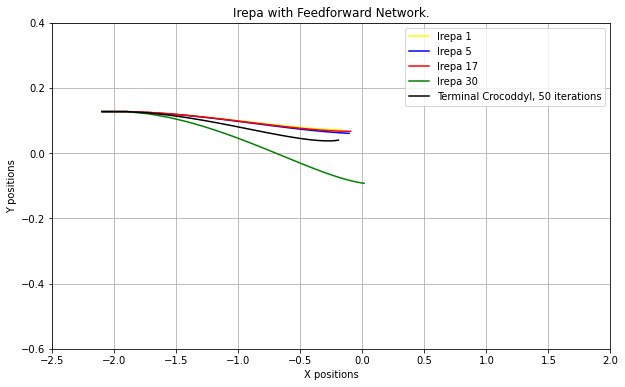

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

for trajectory in fnet1_t:
    ax.plot(trajectory[:,0], trajectory[:,1], c = 'yellow', label="Irepa 1")
    
        
for trajectory in fnet5_t:
    ax.plot(trajectory[:,0], trajectory[:,1], c = 'blue',label="Irepa 5")
        
    
for trajectory in fnet17_t:
    ax.plot(trajectory[:,0], trajectory[:,1], c = 'red',label="Irepa 17")

for trajectory in fnet30_t:
    ax.plot(trajectory[:,0], trajectory[:,1], c = 'green',label="Irepa 30")

for trajectory in fnet50_t:
    ax.plot(trajectory[:,0], trajectory[:,1], c = 'black',label="Terminal Crocoddyl, 50 iterations")
        
     
    
ax.set_xticks(np.arange(-2.5, 2.5, step=0.5))
ax.set_yticks(np.arange(-.6, .6, step=0.2))
ax.grid()
ax.legend()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("Irepa with Feedforward Network.")
#plt.savefig("Irepa1.png")